### 한국어 자연어 처리

* NLTK는 영어 정보처리를 위한 패키지
* 반면, KoNLPy는 한국어 정보처리를 위한 패키지
* 이미 개발된 한글 형태소 분석기들을
  파이썬에서도 사용할 수 있도록 해주는 도우미wrapper 패키지
   + hanannum, Kkma, Komoran, mecab, Okt(twitter)
* konlpy.org/ko

In [ ]:
# 터미너스에서 이거 실행 후 됨
# docker exec -u root -it bigdata bash

# wget https://corretto.aws/downloads/latest/amazon-corretto-8-x64-linux-jdk.deb

# apt-get install java-common

# dpkg -i amazon-corretto-8-x64-linux-jdk.deb 

# java -version

# vi /etc/profile

# export JAVA_HOME=/usr/lib/jvm/java-1.8.0-amazon-corretto
# export PATH=$PATH:$JAVA_HOME/bin
# 추가 후 저장하고 나감

# source /etc/profile

In [5]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tweepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 8.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import konlpy
from konlpy.tag import Okt

In [9]:
# 트위터 형태소 사전을 사용하기 위한 초기화
twitter = Okt()

In [10]:
txt1 = '아버지가방에들어가신다'
txt2 = '아버지가 방에 들어가신다'
txt3 = '또 올라? 치킨이 2만원… 소비자에 비용상승 전가'

In [11]:
# 형태소 분석(품사태깅) : pos(객체명)
twitter.pos(txt1)
twitter.pos(txt2)
twitter.pos(txt3)

[('또', 'Noun'),
 ('올라', 'Verb'),
 ('?', 'Punctuation'),
 ('치킨', 'Noun'),
 ('이', 'Josa'),
 ('2만원', 'Number'),
 ('…', 'Punctuation'),
 ('소비자', 'Noun'),
 ('에', 'Josa'),
 ('비용', 'Noun'),
 ('상승', 'Noun'),
 ('전가', 'Noun')]

In [12]:
# 형태소 상세분석(언간추출stemming) : morphs(객체명, stem=True)
twitter.morphs(txt1)
twitter.morphs(txt1, stem=True)
twitter.morphs(txt2)
twitter.morphs(txt2, stem=True)
twitter.morphs(txt3)
twitter.morphs(txt3, stem=True)

['또', '오르다', '?', '치킨', '이', '2만원', '…', '소비자', '에', '비용', '상승', '전가']

In [13]:
# 명사추출 : nouns(객체명)
twitter.nouns(txt1)
twitter.nouns(txt2)
twitter.nouns(txt3)

['또', '치킨', '소비자', '비용', '상승', '전가']

### konlpy 내장 한국어 말뭉치
* 대한민국 헌법 말뭉치 : kolaw
* 국회 법안 말뭉치 : kobill

In [14]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [15]:
# 말뭉치 파일명 출력
kolaw.fileids()
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [16]:
# 내장 말뭉치 확인
docs = kolaw.open('constitution.txt').read()
docs[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [17]:
## 대한민국 헌법 말뭉치에서 자주 언급되는 단어 분석
from collections import Counter

In [18]:
# 헌법 말뭉치에서 명사 추출
klnouns = twitter.nouns(docs)
klnouns[:10]

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']

In [31]:
# 단어별 빈도 분석
# wc 자체는 슬라이싱이 안됨 , 왜냐? 딕셔너리이기 때문에
# 그래서 list로 바꿔서 슬라이싱
wc = Counter(klnouns)
list(wc.items())[:10]

[('대한민국', 11),
 ('헌법', 53),
 ('유구', 1),
 ('역사', 1),
 ('전통', 1),
 ('우리', 3),
 ('국민', 61),
 ('운동', 2),
 ('건립', 1),
 ('임시정부', 1)]

In [32]:
# 추출된 명사에서 2자이상인 단어만 추출해서 빈도 분석
tokens = twitter.nouns(docs)
klnouns = [t for t in tokens if len(t) >= 2]
klnouns

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '각하',
 '정의',
 '인도',
 '동포',
 '로써',
 '민족',
 '단결',
 '공고',
 '모든',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유민주',
 '질서',
 '더욱',
 '정치',
 '경제',
 '사회',
 '문화',
 '모든',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '국민',
 '생활',
 '향상',
 '기하',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '우리',
 '우리',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '다짐',
 '제정',
 '개정',
 '헌법',
 '이제',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '모든',
 '권력',
 '국민',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '국가',
 '법률',
 '재외국민',
 '보호',
 '의무',
 '대한민국',
 '영토',
 '한반도',
 '부속',
 '도서',
 '대한민국',
 '통일',
 '지향',
 '자유민주',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '대한민국',
 '국제',
 '평화',
 '유지',
 '노력',
 '침략',
 '전쟁',
 '부인',
 '국군',
 '국가',
 '안전보장',
 '국토',
 '방위',
 '의무',
 '수행',
 '사명',
 '정치',
 '중립성',
 '준수',
 '헌법',


In [21]:
wc = Counter(klnouns)
wc.most_common()

[('법률', 127),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('헌법', 53),
 ('모든', 37),
 ('기타', 26),
 ('사항', 23),
 ('권리', 21),
 ('의원', 21),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20),
 ('임명', 20),
 ('직무', 19),
 ('국무총리', 19),
 ('경제', 18),
 ('의무', 18),
 ('조직', 18),
 ('국회의원', 18),
 ('임기', 18),
 ('의결', 17),
 ('공무원', 17),
 ('경우', 17),
 ('이상', 17),
 ('국무위원', 17),
 ('대법원', 17),
 ('범위', 16),
 ('법관', 15),
 ('보호', 14),
 ('정책', 14),
 ('정당', 14),
 ('헌법재판소', 14),
 ('재적', 14),
 ('회의', 14),
 ('항의', 14),
 ('관리', 14),
 ('노력', 13),
 ('보장', 13),
 ('거나', 13),
 ('요구', 13),
 ('법원', 12),
 ('집회', 12),
 ('과반수', 12),
 ('출석', 12),
 ('찬성', 12),
 ('대한민국', 11),
 ('조약', 11),
 ('다만', 11),
 ('재판', 11),
 ('동의', 11),
 ('탄핵', 11),
 ('권한', 11),
 ('안전보장', 10),
 ('공포', 10),
 ('대한', 10),
 ('심판', 10),
 ('시행', 10),
 ('재판관', 10),
 ('위원', 10),
 ('정치', 9),
 ('효력', 9),
 ('대하', 9),
 ('체포', 9),
 ('절차', 9),
 ('형사', 9),
 ('근로', 9),
 ('처분', 9),
 ('위원회', 9),
 ('행정각부', 9),
 ('명령', 9),
 ('사회', 8),
 ('질서', 8),
 ('생활', 8),
 ('제정', 8),
 ('인정

In [22]:
wc['법률']  # 특정 단어의 빈도수
len(wc)    # 전체 단어수

850

In [23]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install image

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import PIL

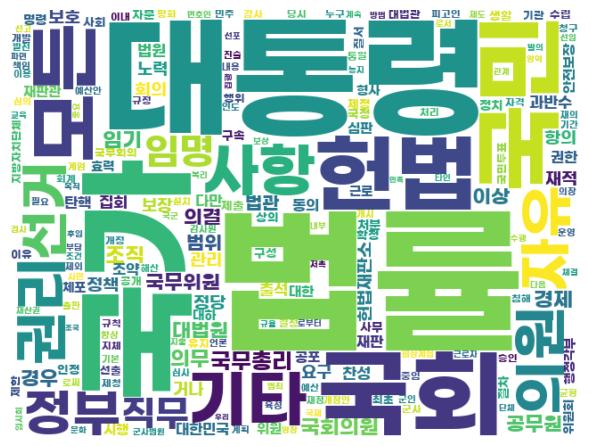

In [28]:
font = './font/GmarketSansTTFBold.ttf'
wcimg = WordCloud(background_color='white', font_path=font, width=640, height=480).generate_from_frequencies(wc)
plt.figure(figsize=(6,6))
plt.imshow(wcimg, interpolation='bilinear')
plt.axis(False)
plt.tight_layout()

### 트럼프 연설문 워드클라우드 (한글)

In [33]:
with open('./data/trump_ko.txt') as f:
    t_docs = f.read()
t_docs[:100]

'정세균 의장님, 존경하는 국회의원 여러분, 내외귀빈 여러분.\n\n미국 국민을 대표해 이 곳 국회 본회의장에서 대한민국 국민들께 연설할 수 있는 특별한 영광을 주셔서 감사합니다.\n\n한'

In [35]:
t_nouns = twitter.nouns(t_docs)
words = [n for n in t_nouns if len(n) > 1]
words[:10]

['정세균', '의장', '존경', '국회의원', '여러분', '내외', '귀빈', '여러분', '미국', '국민']

In [36]:
wc = Counter(words)
wc = dict(wc.most_common())

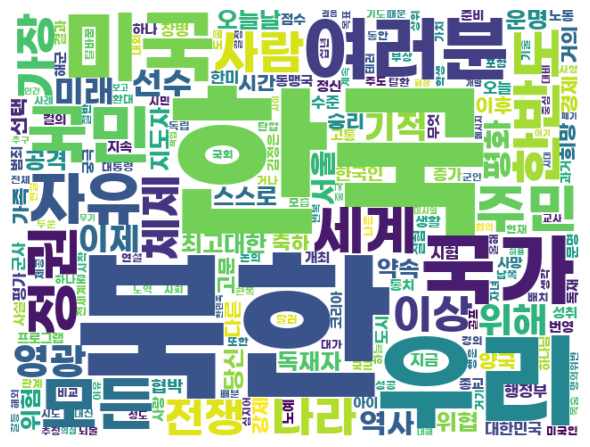

In [37]:
font = './font/GmarketSansTTFBold.ttf'
wcimg = WordCloud(background_color='white', font_path=font, width=640, height=480).generate_from_frequencies(wc)
plt.figure(figsize=(6,6))
plt.imshow(wcimg, interpolation='bilinear')
plt.axis(False)
plt.tight_layout()

### 다양한 색상팔레트를 이용한 워드클라우드
* jiffyclub.github.io/palettable
* 여러가지 배색을 사용하는데 도와주는 패키지
* pip install palettable
* pip install colorbrewer

In [44]:
pip install palettable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 13.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install colorbrewer

Note: you may need to restart the kernel to use updated packages.


### 색상팔레트 유형
* sequential : 수치데이터, 순서가 있는 데이터
* qualitative : 범주형 데이터
* diverging : 수치형/범주형 데이터

In [59]:
import random
from palettable.colorbrewer.sequential import Reds_9
from palettable.colorbrewer.diverging import RdYlBu_11
from palettable.colorbrewer.qualitative import Pastel2_8
from palettable.cartocolors.diverging import Temps_7

In [62]:
# 워드클라우드 문자출력에 사용할
# 색상팔레트를 함수 color_func로 정의
def color_func(word, font_size, position,
        orientation, random_state=None, **kwargs):
    #return tuple(Reds_9.colors[random.randint(0,8)])
    return tuple(Temps_7.colors[random.randint(0,6)])
    #return tuple(Pastel2_8.colors[random.randint(0,7)])

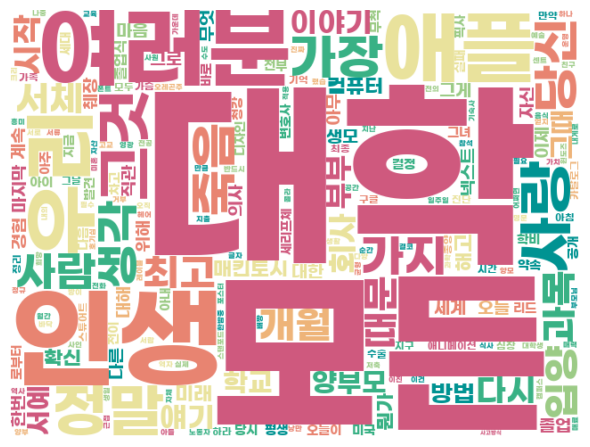

In [63]:
font = './font/GmarketSansTTFBold.ttf'
wcimg = WordCloud(background_color='white', font_path=font, width=640, height=480).generate_from_frequencies(wc)\
        .recolor(color_func=color_func)
plt.figure(figsize=(6,6))
plt.imshow(wcimg, interpolation='bilinear')
plt.axis(False)
plt.tight_layout()

### 스티브잡스 연설문 워드클라우드 (한글)

In [38]:
with open('./data/stevejobs_ko.txt') as f:
    j_docs = f.read()
j_docs[:100]

'오늘 세계 최고 대학 중 한 곳의 졸업식에 참석하게 되어 영광입니다. 나는 대학을 졸업한 적이 없습니다. 솔직히 오늘이 대학 졸업식에 가장 근접해본 것입니다. 오늘 저는 내 인생의'

In [39]:
j_nouns = twitter.nouns(j_docs)
words = [n for n in j_nouns if len(n) > 1]
words[:10]

['오늘', '세계', '최고', '대학', '졸업식', '참석', '영광', '대학', '졸업', '오늘이']

In [40]:
wc = Counter(words)
wc = dict(wc.most_common())

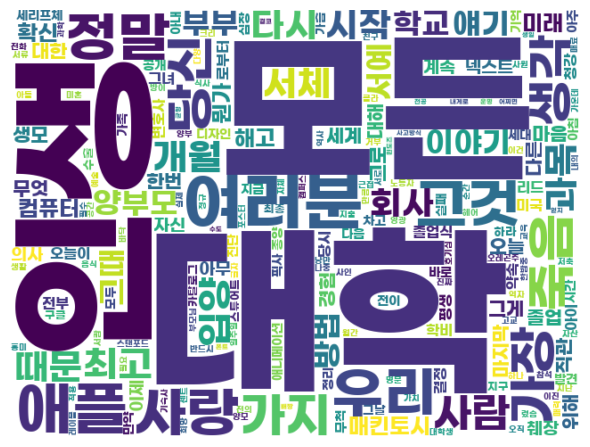

In [43]:
font = './font/GmarketSansTTFBold.ttf'
wcimg = WordCloud(background_color='white', font_path=font, width=640, height=480).generate_from_frequencies(wc)
plt.figure(figsize=(6,6))
plt.imshow(wcimg, interpolation='bilinear')
plt.axis(False)
plt.tight_layout()

### 대통령 신년사 워드클라우드

In [64]:
with open('./data/speech02.txt') as f:
    spe = f.read()
spe[:100]

'존경하는 국민 여러분,\n\n\n\n유난히 추운 날씨에 새해를 맞았습니다. \n\n‘동지섣달에 북풍이 불면 풍년이 든다’는 속담이 있습니다.\n\n추운 날씨가 올해 풍년을 알리는 소식 같습니다.'

In [67]:
s_nouns = twitter.nouns(spe)
words = [n for n in s_nouns if len(n) > 1]
words[:10]

['존경', '국민', '여러분', '날씨', '새해', '섣달', '북풍', '불면', '풍년', '속담']

In [88]:
wc = Counter(words)
wc = dict(wc.most_common())
wc

{'국민': 22,
 '우리': 20,
 '경제': 17,
 '혁신': 12,
 '여러분': 9,
 '평화': 9,
 '기업': 8,
 '나라': 6,
 '시대': 6,
 '정부': 6,
 '성장': 6,
 '일자리': 6,
 '오늘이': 5,
 '정책': 5,
 '사회': 5,
 '마음': 4,
 '희망': 4,
 '반드시': 4,
 '스마트': 4,
 '투자': 4,
 '지원': 4,
 '새해': 3,
 '모두': 3,
 '인사': 3,
 '자영': 3,
 '업자': 3,
 '공감': 3,
 '여기': 3,
 '어머니': 3,
 '아버지': 3,
 '위해': 3,
 '수출': 3,
 '국가': 3,
 '모델': 3,
 '산업': 3,
 '분야': 3,
 '산업혁명': 3,
 '추진': 3,
 '본격': 3,
 '적극': 3,
 '한반도': 3,
 '존경': 2,
 '날씨': 2,
 '풍년': 2,
 '올해': 2,
 '오늘': 2,
 '중소기업': 2,
 '대표': 2,
 '인도': 2,
 '변화': 2,
 '다시': 2,
 '서로': 2,
 '문화': 2,
 '내외': 2,
 '귀빈': 2,
 '내일': 2,
 '자식': 2,
 '생각': 2,
 '자신': 2,
 '촛불': 2,
 '세계': 2,
 '지금': 2,
 '한계': 2,
 '중심': 2,
 '가치': 2,
 '구조': 2,
 '극복': 2,
 '선도': 2,
 '불평등': 2,
 '경제성장': 2,
 '발전': 2,
 '방향': 2,
 '시기': 2,
 '성과': 2,
 '최선': 2,
 '모든': 2,
 '인내': 2,
 '나가야': 2,
 '양보': 2,
 '타협': 2,
 '창의': 2,
 '공장': 2,
 '예산': 2,
 '지능': 2,
 '통해': 2,
 '안정': 2,
 '정규직': 2,
 '대타협': 2,
 '광주': 2,
 '지난': 2,
 '번영': 2,
 '섣달': 1,
 '북풍': 1,
 '불면': 1,
 '속담': 1,
 '소식': 1,
 '추위': 1,
 '가정': 1

In [92]:
from palettable.wesanderson import Mendl_4

In [93]:
def color_func(word, font_size, position,
        orientation, random_state=None, **kwargs):
    return tuple(Mendl_4.colors[random.randint(0,3)])

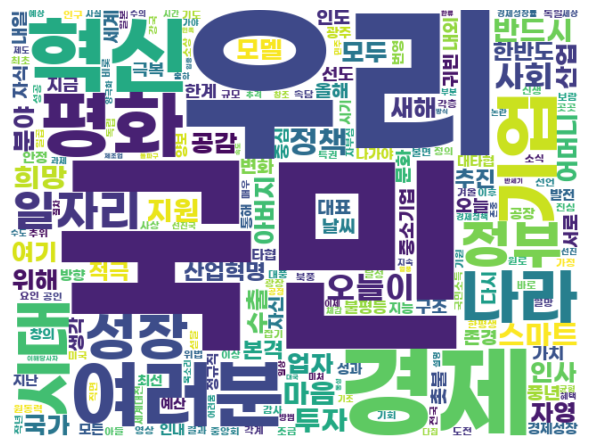

In [94]:
font = './font/GmarketSansTTFBold.ttf'
wcimg = WordCloud(background_color='white', font_path=font, width=640, height=480).generate_from_frequencies(wc)
plt.figure(figsize=(6,6))
plt.imshow(wcimg, interpolation='bilinear')
plt.axis(False)
plt.tight_layout()